<a href="https://colab.research.google.com/github/blazingbhavneek/scikit-learn_projects/blob/master/stress_level_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Human Stress Detection in and through Sleep
## By [Bhavneek Singh](https://bhavneek.netlify.app/), IIT Delhi

Smart-Yoga Pillow (SaYoPillow) was invented to help in understanding the relationship between stress and sleep and to fully materialize the idea of “Smart-Sleeping” by proposing an edge device. An edge processor with a model analyzing the physiological changes that occur during sleep along with the sleeping habits is proposed.

In SayoPillow.csv, we will see the relationship between the parameters- snoring range of the user, respiration rate, body temperature, limb movement rate, blood oxygen levels, eye movement, number of hours of sleep, heart rate and Stress Levels (0- low/normal, 1 – medium low, 2- medium, 3-medium high, 4 -high)

sr-snoring rate

rr-respiration rate

t-body temperature 

lm-limb movement

bo-blood oxygen

rem-eye movement

sr-sleeping hours

hr-heart rate

sl-stress level

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df = pd.read_csv("SaYoPillow.csv")

### Getting general idea of the data

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


No NULL values, Great!

In [88]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sr,630.0,71.6,19.372833,45.0,52.50,70.0,91.25,100.0
rr,630.0,21.8,3.966111,16.0,18.50,21.0,25.00,30.0
t,630.0,92.8,3.529690,85.0,90.50,93.0,95.50,99.0
lm,630.0,11.7,4.299629,4.0,8.50,11.0,15.75,19.0
bo,630.0,90.9,3.902483,82.0,88.50,91.0,94.25,97.0
rem,630.0,88.5,11.893747,60.0,81.25,90.0,98.75,105.0
sr.1,630.0,3.7,3.054572,0.0,0.50,3.5,6.50,9.0
hr,630.0,64.5,9.915277,50.0,56.25,62.5,72.50,85.0
sl,630.0,2.0,1.415337,0.0,1.00,2.0,3.00,4.0


In [89]:
df.head(10)

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
5,56.88,19.376,95.376,9.376,94.064,83.44,6.376,58.44,1
6,47.00,16.800,97.200,5.600,95.800,68.00,7.800,52.00,0
7,50.00,18.000,99.000,8.000,97.000,80.00,9.000,55.00,0
8,45.28,16.112,96.168,4.224,95.112,61.12,7.112,50.28,0
9,55.52,19.104,95.104,9.104,93.656,82.76,6.104,57.76,1


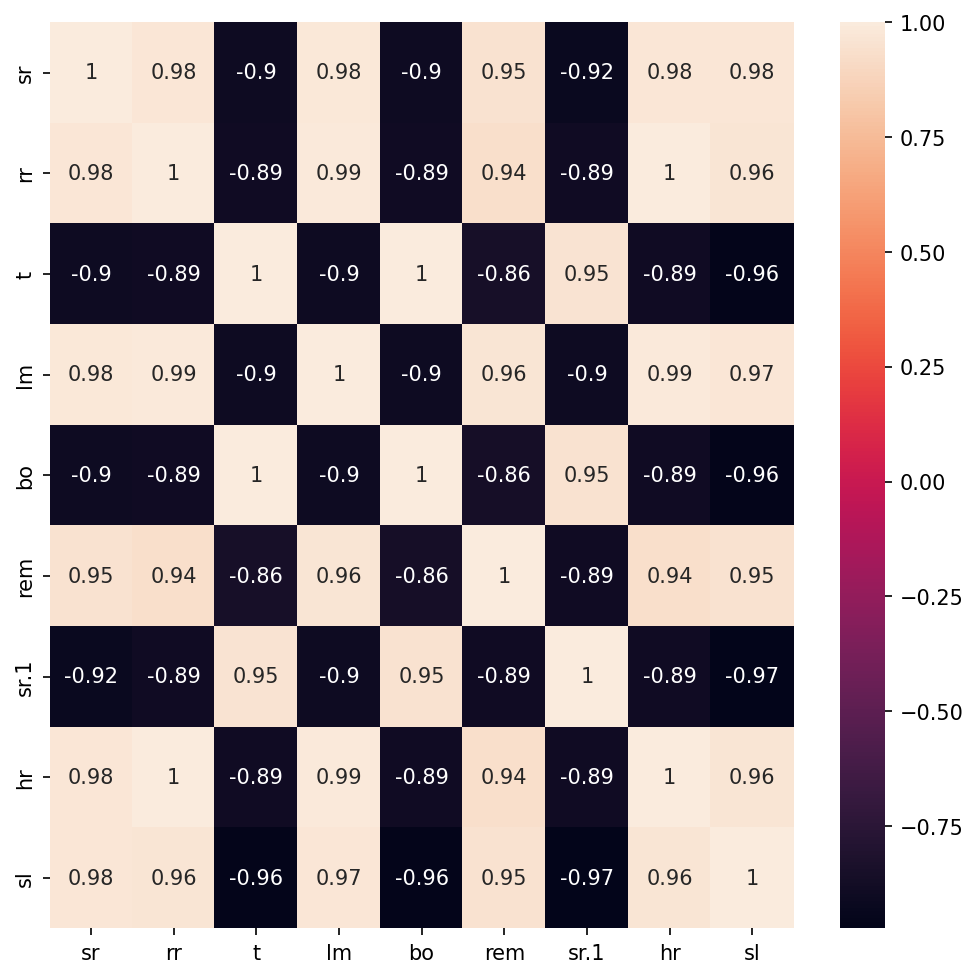

In [90]:
plt.figure(figsize=(8,8),dpi=150)
sns.heatmap(df.corr(),annot=True)

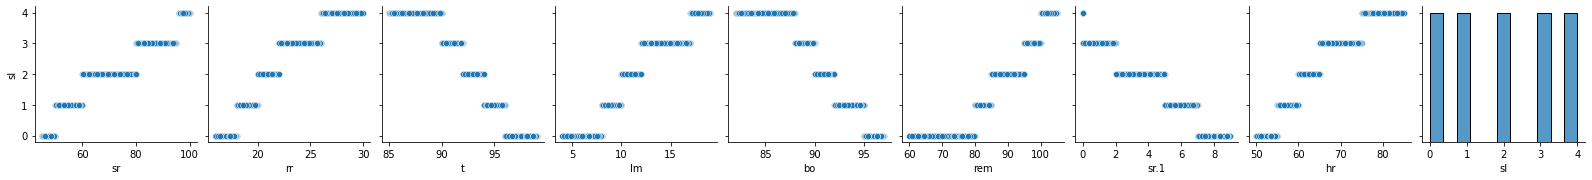

In [91]:
sns.pairplot(df, y_vars='sl', x_vars=df.columns.values)

Judging from staircase shape like plots, it looks like logistic regression should yield fairly accurate results

## Preprocessing

In [92]:
# Separating Label
X = df.drop('sl',axis=1)
y = df['sl']

In [93]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [94]:
# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
sX_train = scaler.transform(X_train)
sX_test = scaler.transform(X_test)

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

## Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
log_model = LogisticRegression(multi_class="ovr",max_iter=5000000000)

In [98]:
log_model.fit(sX_train,y_train)

LogisticRegression(max_iter=5000000000, multi_class='ovr')

In [99]:
log_model.coef_

array([[-0.81690359, -0.98432225,  1.83048196, -1.27163562,  1.55156138,
        -1.80450113,  1.64177258, -0.98432225],
       [-5.0706216 , -0.85084529, -3.27146401,  1.33304752,  0.6158265 ,
         3.51638181,  2.34744491, -0.85084529],
       [ 0.1072966 , -1.44014857,  1.04748838, -2.40712448, -1.17892164,
         4.33221106, -0.54166138, -1.44014857],
       [ 3.90119397, -2.46937298,  1.61702812,  0.84521949,  2.19173303,
         1.76126243, -4.74851176, -2.46937298],
       [ 0.69886193,  1.51066636, -1.65693243,  1.06614374, -1.68096928,
         0.63519622, -0.76422247,  1.51066636]])

In [100]:
y_pred = log_model.predict(sX_test)

In [101]:
accuracy_score(y_test,y_pred)

1.0

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


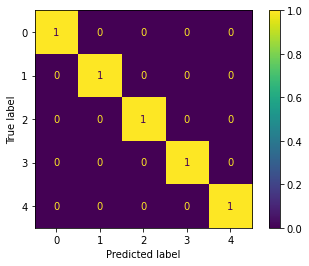

In [102]:
plot_confusion_matrix(log_model,sX_test,y_test,normalize='true')

## Inference
As we saw from the pair plot, we had very distinct boundaries for stress level for all features. So our model was able to achieve 100% accuracy fairly easly